In [1]:
import pandas as pd
from sklearn import datasets

In [2]:
# Load Iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

# Convert the dataset to a pandas DataFrame for easier plotting
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target_names[iris.target]

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of data:")
print(iris_df.head())

# Display the structure of the dataset
print("\nSummary of dataset:")
print(iris_df.info())

# Display a frequency table of the 'Species' column
print("\nFrequency table of 'Species':")
print(pd.value_counts(iris_df['Species']))

First 5 rows of data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species      

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

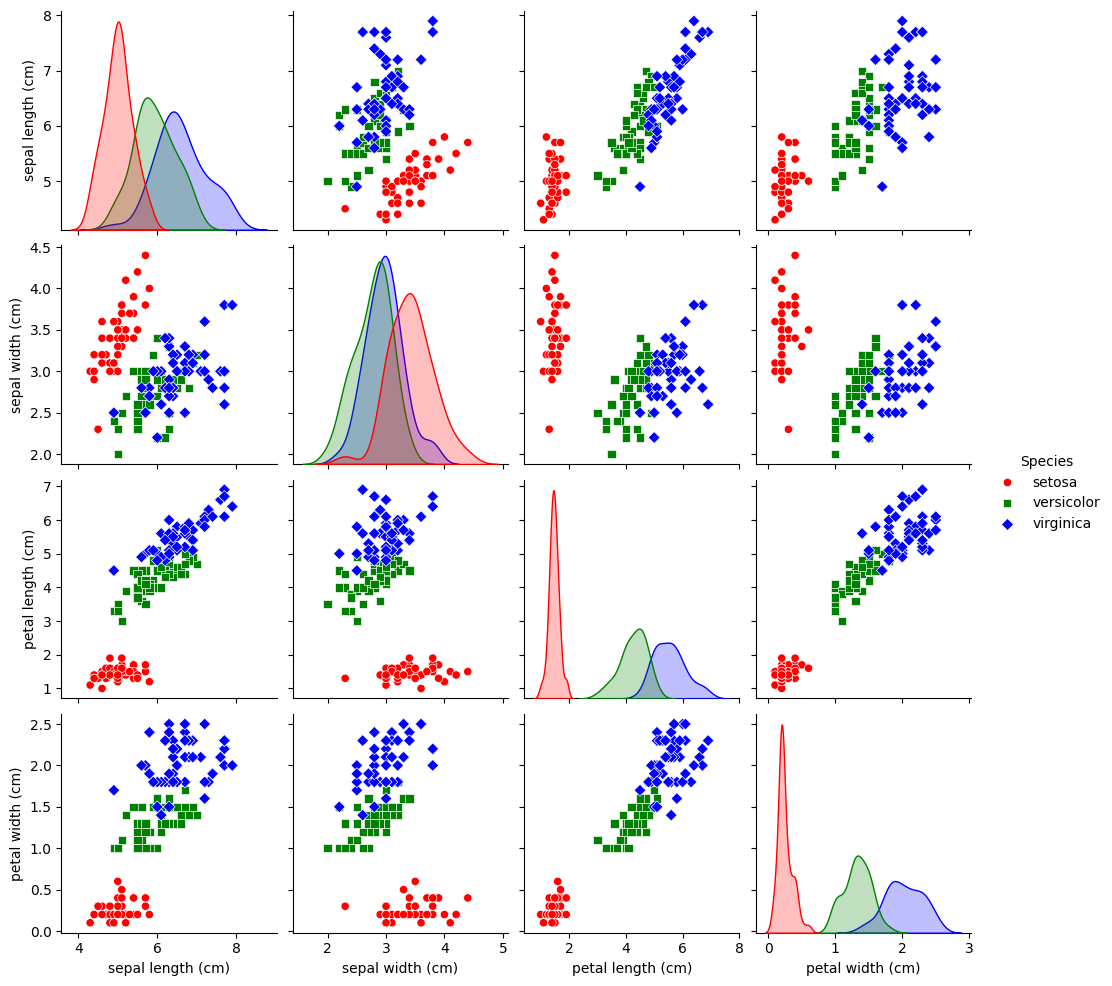

In [5]:
# Set the color palette for each species
palette = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Create a pairs plot
sns.pairplot(iris_df, hue='Species', palette=palette, markers=["o", "s", "D"])

# Display the plot
plt.show()

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.utils import to_categorical

In [7]:
# Randomly sample 100 of 150 row indexes
indexes = np.random.choice(150, 100, replace=False)

# Create a training set from sampled indexes
x_train = iris_df.iloc[indexes, :-1].values

# Create a test set from remaining indexes
x_test = iris_df.drop(indexes).iloc[:, :-1].values

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# One-hot-encoding the class labels for the training set
y_train = to_categorical(iris_df.iloc[indexes, -1].astype('category').cat.codes)

# Convert train_y to a NumPy array
y_train = np.array(y_train)

# One-hot-encoding the class labels for the test set
y_test = to_categorical(iris_df.drop(indexes).iloc[:, -1].astype('category').cat.codes)

# Convert test_y to a NumPy array
y_test = np.array(y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
# Create a linear stack of layers
model = Sequential()

# Add a dense layer with 4 units, ReLU activation, and input shape 4
model.add(Dense(units=4, activation='relu', input_shape=(4,)))

# Add a dense layer with 3 units and softmax activation
model.add(Dense(units=3, activation='softmax'))

In [10]:
from keras.optimizers import RMSprop

In [11]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
16/16 [==============================] - 0s 7ms/step - loss: 1.4731 - accuracy: 0.1000 - val_loss: 1.3729 - val_accuracy: 0.0500
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 1.4062 - accuracy: 0.1000 - val_loss: 1.3241 - val_accuracy: 0.0500
Epoch 3/200
16/16 [==============================] - 0s 998us/step - loss: 1.3507 - accuracy: 0.1125 - val_loss: 1.2787 - val_accuracy: 0.0500
Epoch 4/200
16/16 [==============================] - 0s 969us/step - loss: 1.2997 - accuracy: 0.1000 - val_loss: 1.2376 - val_accuracy: 0.0500
Epoch 5/200
16/16 [==============================] - 0s 983us/step - loss: 1.2523 - accuracy: 0.1125 - val_loss: 1.1987 - val_accuracy: 0.0500
Epoch 6/200
16/16 [==============================] - 0s 986us/step - loss: 1.2088 - accuracy: 0.1500 - val_loss: 1.1642 - val_accuracy: 0.1000
Epoch 7/200
16/16 [==============================] - 0s 981us/step - loss: 1.1682 - accuracy: 0.2125 - val_loss: 1.1318 - val_accuracy: 0.1500
Epo

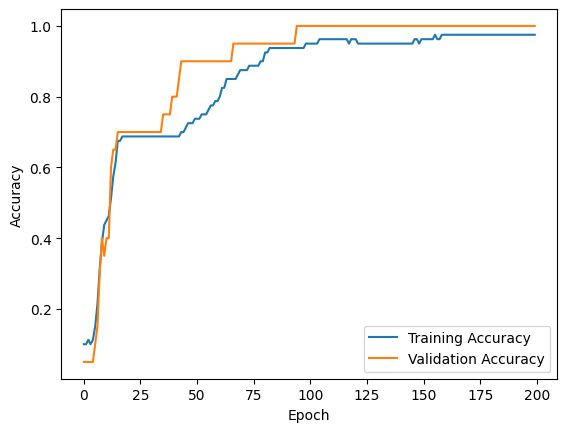

In [12]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=5,
    validation_split=0.2
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

2/2 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.9200

Test accuracy: 92.00%


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

2/2 [==============================] - 0s 1ms/step


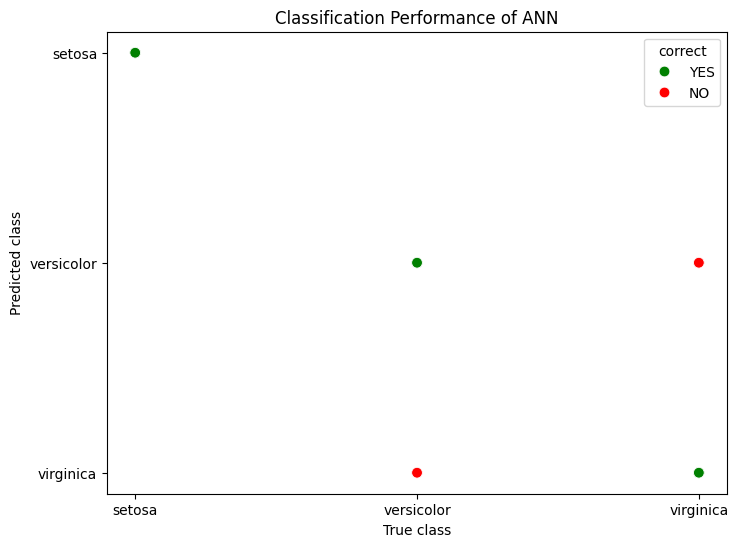

In [15]:
pred_probs = model.predict(x_test)
pred_y = pred_probs.argmax(axis=-1)

target = y_test.argmax(axis=-1)

# Plotting using seaborn
result_df = pd.DataFrame({
    'target': pd.Categorical(target),
    'pred_y': pd.Categorical(pred_y),
    "correct": ["YES" if t == p else "NO" for t, p in zip(target, pred_y)]
})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='target', y='pred_y', hue='correct', data=result_df, palette=['green', 'red'], s=60)
plt.xticks(range(len(iris_df['Species'].unique())), iris_df['Species'].unique())
plt.yticks(range(len(iris_df['Species'].unique())), iris_df['Species'].unique())
plt.title("Classification Performance of ANN")
plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.show()

Confusion Matrix:
    0   1   2
0  15   0   0
1   0  17   2
2   0   2  14


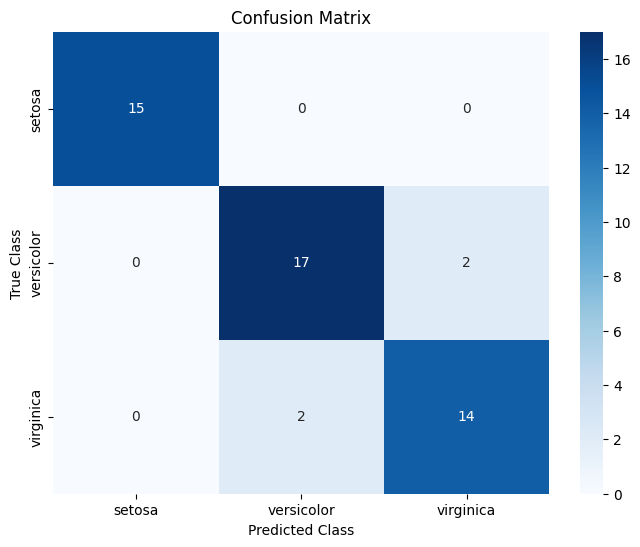

In [16]:
# Plot the confusion matrix
cm = confusion_matrix(result_df['target'], result_df['pred_y'])

# Set row and column names
class_labels = result_df['target'].cat.categories
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris_df['Species'].unique(), yticklabels=iris_df['Species'].unique())
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()